In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("random-forest-regression-dataset.csv", header=None)
print(data.info())
print("*********************************************************")
print(data.head())
print("*********************************************************")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10 non-null     int64
 1   1       10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None
*********************************************************
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50
*********************************************************
              0          1
count  10.00000   10.00000
mean    5.50000   46.50000
std     3.02765   31.27388
min     1.00000    5.00000
25%     3.25000   22.50000
50%     5.50000   45.00000
75%     7.75000   67.50000
max    10.00000  100.00000


In [7]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state= 42) 
rf.fit(x,y)

print("7.8 seviyesinde fiyatın ne kadar olduğu: ",rf.predict(np.array([7.8]).reshape(-1,1)))

x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

7.8 seviyesinde fiyatın ne kadar olduğu:  [22.7]


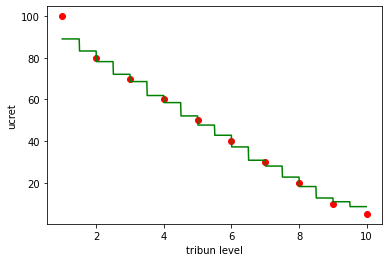

In [9]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

In [10]:
y_head = rf.predict(x)
from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_head))

r_score:  0.9798724794092587


In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=sns.load_dataset("tips")
df=pd.DataFrame(data)

#EKSİK VERİ DOLDURMA
from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(missing_values=np.nan, strategy="mean") #eksik verileri boş sütünlarına ortalamasını verdik
imputer=imputer.fit(df[["total_bill"]])
df[["total_bill"]]=imputer.transform(df[["total_bill"]])

#KATEGORİK OLMAYAN DEĞİŞKENLER
total_bill=df[["total_bill"]]
tip=df[["tip"]]
size=df[["size"]]

#KATEGORİK DEĞİŞKENLER

import pandas as pd
smoker=pd.get_dummies(df[["smoker"]])
time=pd.get_dummies(df[["day"]])

result=df["day"].value_counts()

#KUKLA (DUMMIES) DEĞİŞKENİNİ KALDIRMA
smoker=smoker.drop("smoker_Yes",axis=1)

#VERİLERİ BİRLEŞTİRME
new_data=pd.concat([total_bill,size,smoker,time,tip],axis=1) # tahmin etmek istedğiniz değeri sona koyun train test split için kolaylık sağlar

#TRAİN VE TEST BELİRLEME
training=new_data.iloc[:,0:1].values # 7 ye kadarkı stunlar train için
testing=new_data.iloc[:,7:8].values

#TRAİN VE TEST AYIRMA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.30,random_state=42)

In [12]:
from sklearn.svm import SVR

In [13]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [14]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = svr_model.predict(x_test)
r2=r2_score(y_test,y_pred)

mse=np.sqrt(mean_squared_error(y_test,y_pred))

print("---------------------------")
print("İlk Ortalama Karekök",mse)
print("---------------------------")
print("İlk R2 Değeri:",r2)

---------------------------
İlk Ortalama Karekök 0.8808550106731795
---------------------------
İlk R2 Değeri: 0.41138528809714914
